In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
rating = pd.read_csv('rating.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
movie = pd.read_csv('movie.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65345 entries, 0 to 65344
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     65345 non-null  int64  
 1   movieId    65345 non-null  int64  
 2   rating     65345 non-null  float64
 3   timestamp  65345 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ MB


In [ ]:
rating.describe()

,userId,movieId,rating
count,65345.000000,65345.000000,65345.000000
mean,246.179065,8302.833499,3.488790
std,132.407559,18631.322621,1.079531
min,1.000000,1.000000,0.500000
25%,132.000000,828.000000,3.000000
50%,254.000000,2111.000000,3.500000
75%,367.000000,4361.000000,4.000000
max,459.000000,128488.000000,5.000000


In [ ]:
movie.dropna(inplace=True)
rating.dropna(inplace=True)


In [ ]:
new_df = rating.merge(movie,on='movieId')


In [ ]:
new_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


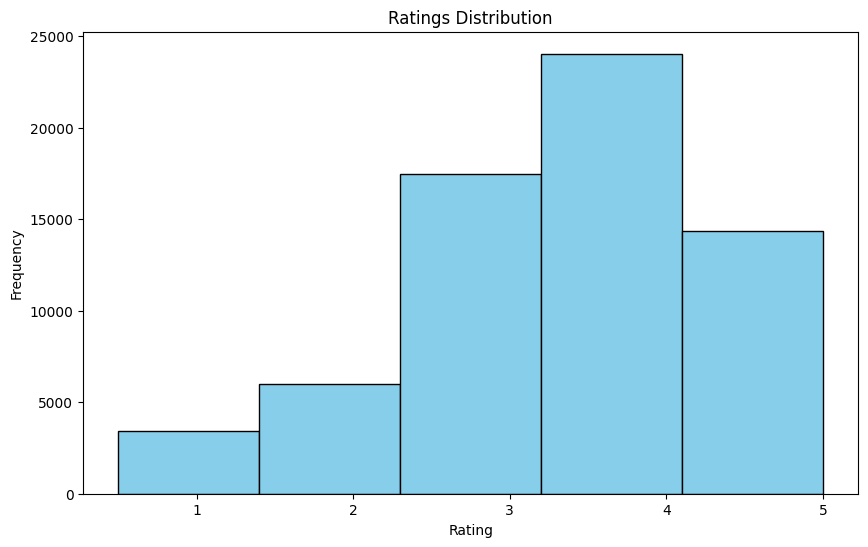

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(new_df['rating'], bins=5, edgecolor='black', color='skyblue')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


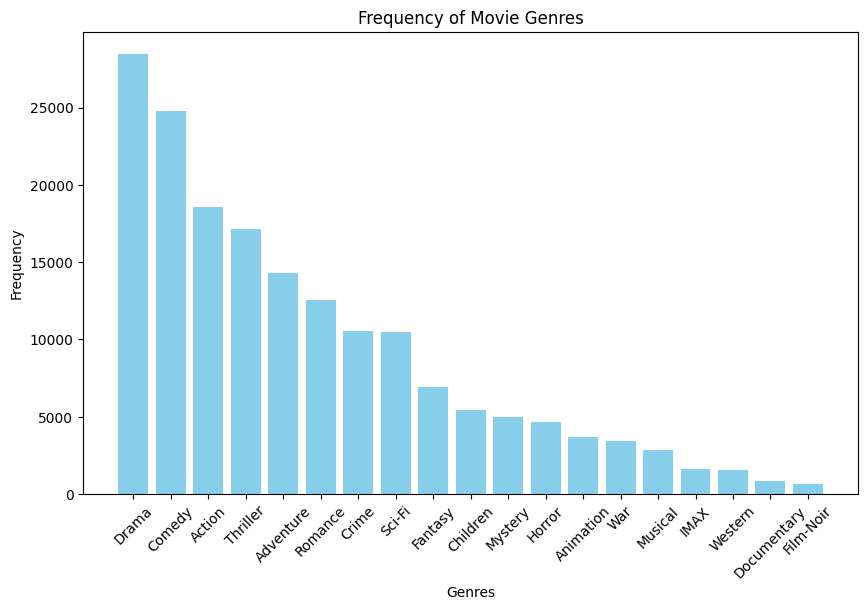

In [ ]:


# Step 1: Get the frequency of each genre
genre_counts = new_df['genres'].str.split('|', expand=True).stack().value_counts()

# Step 2: Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


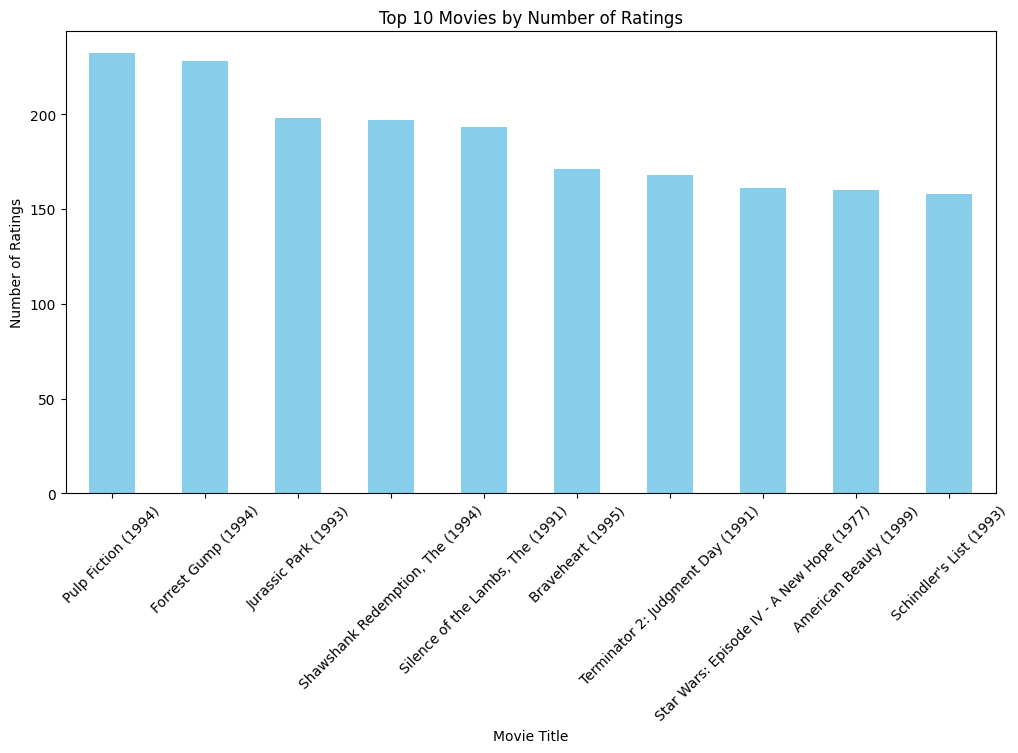

In [ ]:
#Get the number of ratings for each movie
num_ratings = new_df.groupby('title')['rating'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
num_ratings[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Movies by Number of Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Assuming you have loaded the 'new_df' DataFrame correctly

# Step 1: Create the user-item matrix
user_item_matrix = new_df.pivot_table(index='userId', columns='movieId', values='rating')
user_item_matrix = user_item_matrix.fillna(0)

# Step 2: Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
movie_similarity = cosine_similarity(user_item_matrix.T)

# Step 3: Define the recommend_movies function
def recommend_movies(movie_title, top_n=5):
    if movie_title in new_df['title'].values:  # Make sure to replace 'title' with the actual column name
        movie_index = new_df[new_df['title'] == movie_title]['movieId'].values[0]  # Get the movieId
        similar_scores = list(enumerate(movie_similarity[movie_index]))
        similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
        similar_movie_indices = [i[0] for i in similar_scores[1:top_n+1]]
        similar_movies = new_df.loc[similar_movie_indices, 'title'].tolist()
        return similar_movies
    else:
        return []




In [ ]:
recommended_movies = recommend_movies('Grumpier Old Men (1995)', top_n=5)

print("Recommended Movies:")
for movie in recommended_movies:
    print(movie)

Recommended Movies:
Pulp Fiction (1994)
Seven (a.k.a. Se7en) (1995)
Mask, The (1994)
Pulp Fiction (1994)
Terminator 2: Judgment Day (1991)


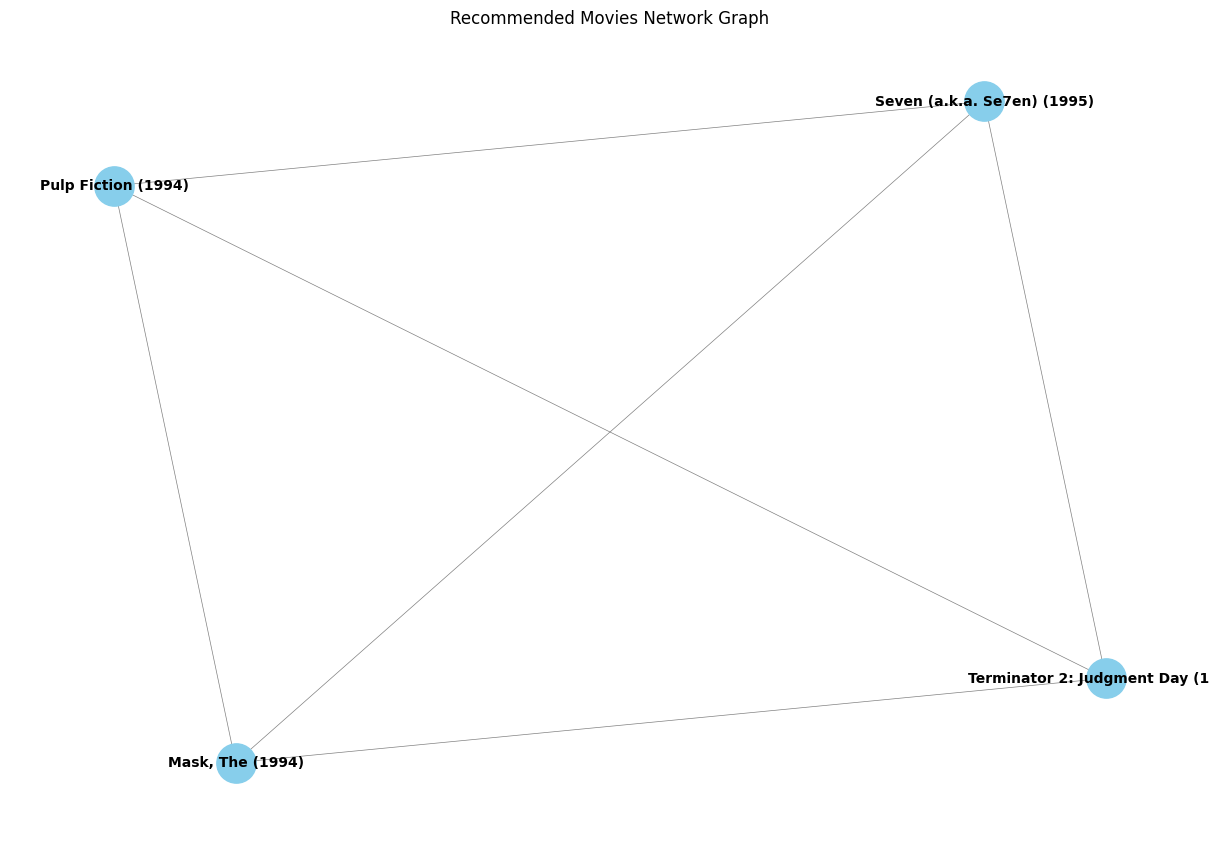

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_movie_network(recommended_movies):
    G = nx.Graph()

    # Add nodes (movies)
    G.add_nodes_from(recommended_movies)

    # Add edges (connections between movies)
    for movie1 in recommended_movies:
        for movie2 in recommended_movies:
            if movie1 != movie2:
                G.add_edge(movie1, movie2)

    return G

def plot_movie_network(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=800, font_size=10, node_color='skyblue', font_color='black', font_weight='bold', width=0.5, edge_color='gray', edge_cmap=plt.cm.Blues)
    plt.title("Recommended Movies Network Graph")
    plt.show()

# Example usage:
recommended_movies = recommend_movies('Grumpier Old Men (1995)', top_n=5)
movie_network = create_movie_network(recommended_movies)
plot_movie_network(movie_network)


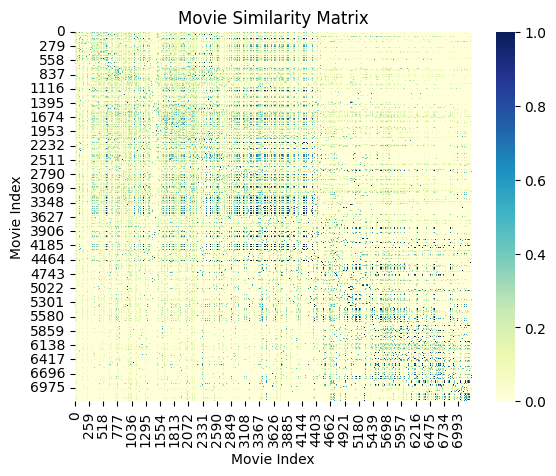

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'movie_similarity' is your similarity matrix
sns.heatmap(movie_similarity, cmap='YlGnBu')
plt.title('Movie Similarity Matrix')
plt.xlabel('Movie Index')
plt.ylabel('Movie Index')
plt.show()
